#  Naira Marley Face Detector 

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2
import face_recognition
import matplotlib.pyplot as plt
import os
%matplotlib inline

### A helper function to view images

In [2]:
def plot_images(images,number_of_images=3, labels=None):

    fig, axes = plt.subplots(nrows=1, ncols=number_of_images, figsize=(30,20))
    for y in range(number_of_images):
        axes[y].imshow(images[y])
        if labels is not None:
            axes[y].set_title(labels[y], fontsize=25)         
    plt.show()

### convert jpg files into numpy arrays

In [3]:
database_image = face_recognition.load_image_file("pics/naira_marley_resized1.jpg")

query_image1 = face_recognition.load_image_file("pics/naira_marley_resized3.jpg")

query_image2 = face_recognition.load_image_file("pics/drake_resized.jpg")

### visualise images

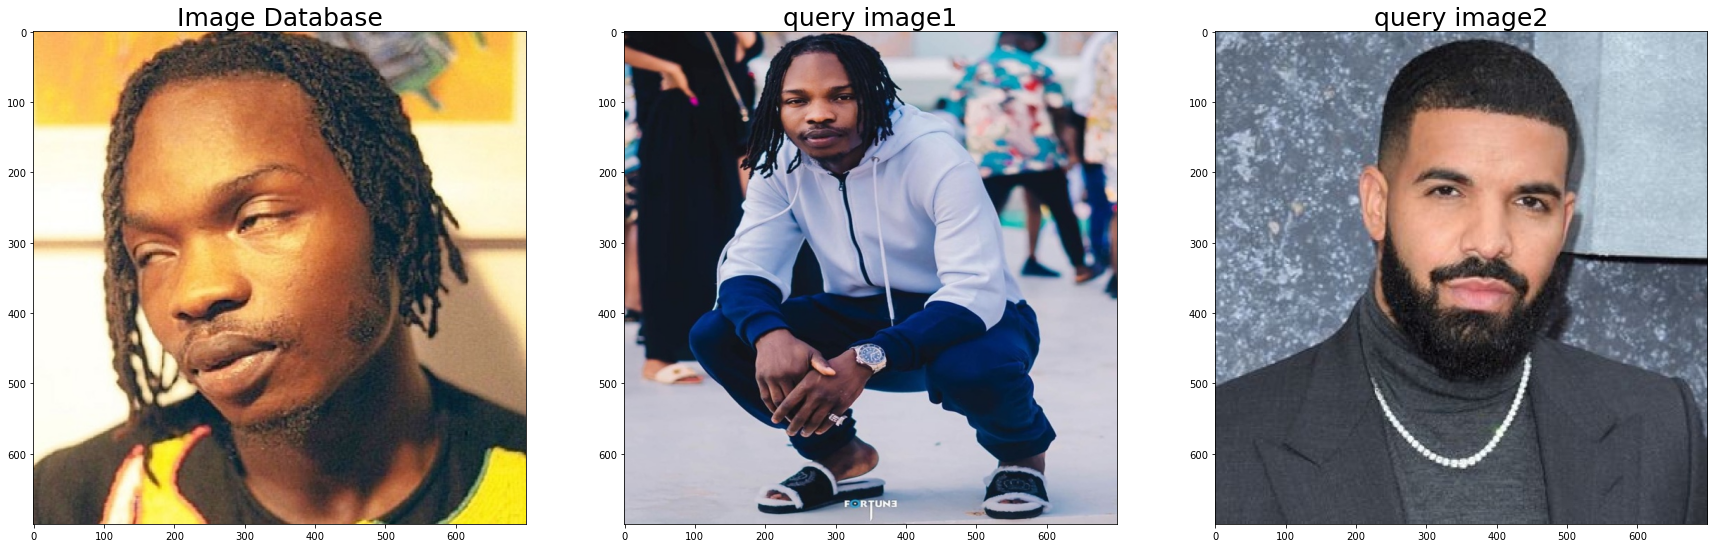

In [4]:
labels = ["Image Database", "query image1", "query image2"]
plot_images([database_image, query_image1, query_image2], labels=labels)

### find face encodings in training image/database images

In [5]:
database_face_location = face_recognition.face_locations(database_image, model="cnn")
database_face_encodings= face_recognition.face_encodings(database_image, database_face_location)[0]
known_face_encodings = [database_face_encodings]
known_face_names = ["Naira Marley"]


### helper function that performs face identification and draws bounding boxes of identified faces

In [8]:
def face_detection(img):
    face_locations = face_recognition.face_locations(img, model="cnn")
    print (face_locations)
    face_encodings = face_recognition.face_encodings(img, face_locations)
    #convert image to PIL-format image so we can draw on it
    pil_image = Image.fromarray(img)
    draw = ImageDraw.Draw(pil_image)    
    font = ImageFont.truetype(os.path.join(os.getcwd(), "arial.ttf"), 30)
    
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        #returns True or False value on if the encodings is a match.
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name  = "unknown"
        if matches[0]:
            name = known_face_names[0]
            print(name)
        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255), width=10)

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255), font=font)
      
    #remove drawing library from memory as per Pillow docs
    del draw
    return pil_image
 
    
    

In [9]:
query_img1 = face_detection(query_image1)
query_img2  = face_detection(query_image2)

[(49, 342, 190, 200)]
Naira Marley
[(166, 478, 410, 233)]


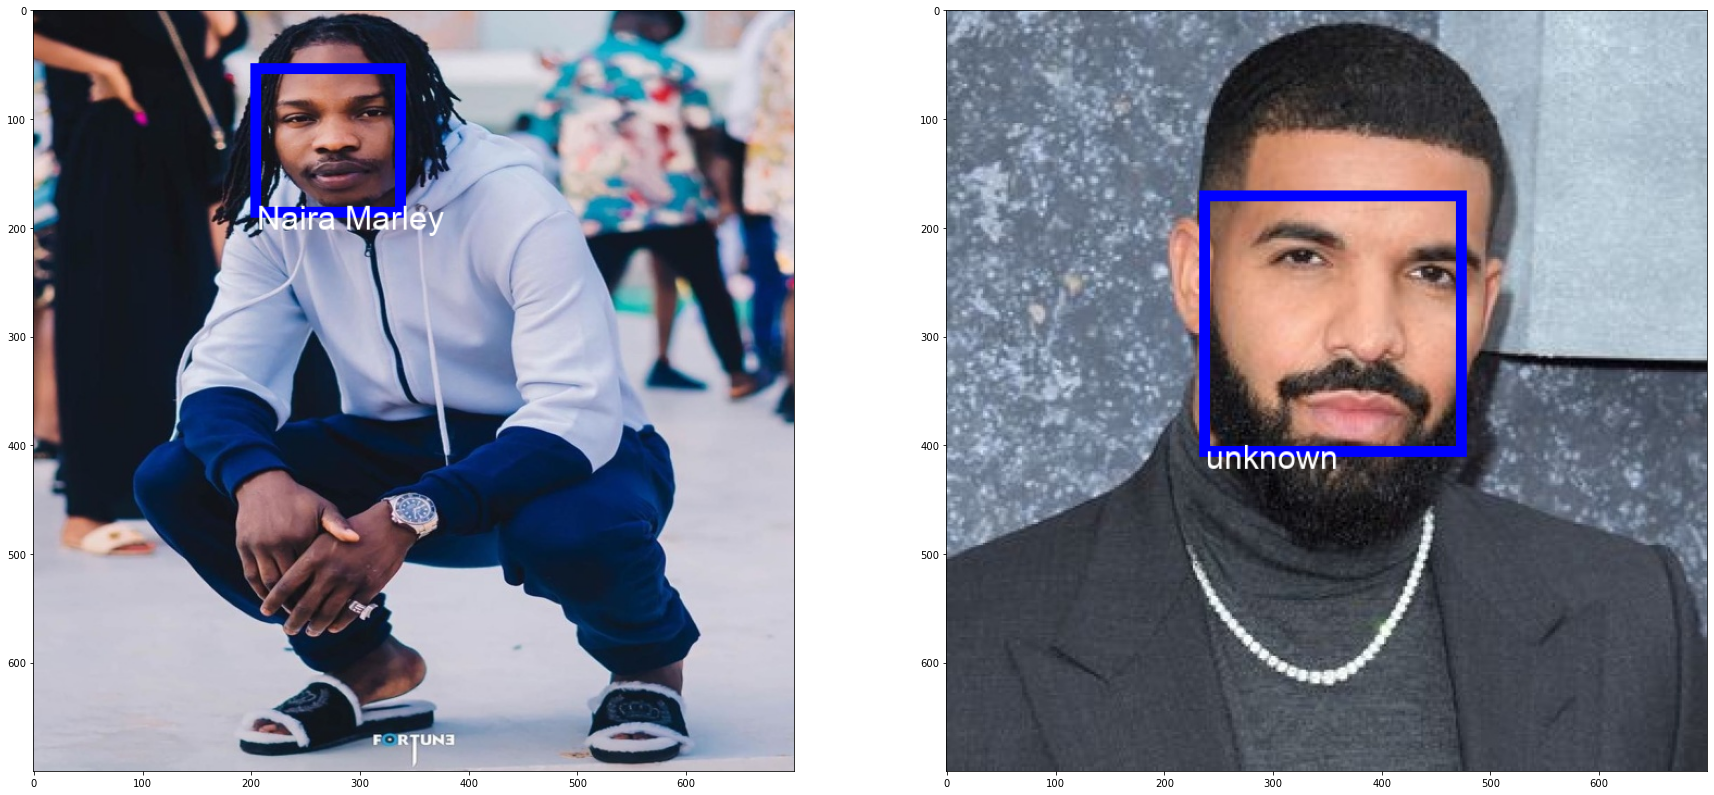

In [10]:
plot_images([query_img1, query_img2], number_of_images=2)